**Лабораторная работа 1**

**Выполнил Кирилл Запорожченко, ФЗ-11**

# Отображатель графиков обучения

In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output
from tensorflow.keras import backend as K


class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.inter_dim = []
        self.val_inter_dim = []
        self.logits = []
        self.val_logits = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        self.i += 1
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        clear_output(wait=True)

        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss:" +
                 str(round(logs.get('loss'), 2)))
        ax1.plot(self.x, self.val_losses, label="v_loss:" +
                 str(round(logs.get('val_loss'), 2)))
        ax1.legend()

        ax2.plot(self.x, self.acc, label="acc:" +
                 str(round(logs.get('accuracy'), 2)))
        ax2.plot(self.x, self.val_acc, label="v_acc:" +
                 str(round(logs.get('val_accuracy'), 2)))
        ax2.legend()

        plt.savefig("fig")
        plt.show()


plot = PlotLearning()



# Загружаем и исследуем датасет

170498071/170498071 [==============================] - 4s 0us/step


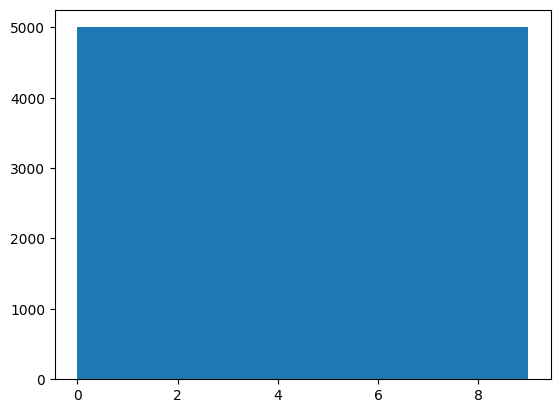

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import os
import tensorflow.keras as keras
import numpy as np

num_classes = 10

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.hist(y_train, num_classes)
plt.show()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train /= 255
x_test /= 255

In [28]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.1 MB/s eta 0:00:00


# Создание и обучение модели
Создаем и обучаем полносвязную сеть

#### Вариант 1

In [44]:
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy


num_classes = 10  # Количество классов
input_shape = (32, 32, 3)  # Размер входного изображения

model = Sequential()
model.add(Flatten(input_shape=input_shape))

# Скрытые слои с Dropout и BatchNormalization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('mish'))

# Выходной слой
model.add(Dense(num_classes, activation='softmax'))

# Оптимизатор и функция потерь
opt = Adam(0.001)
loss = CategoricalCrossentropy()

model.compile(loss=loss,
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_29 (Dense)            (None, 256)               786688    
                                                                 
 batch_normalization_13 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_23 (Activation)  (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_14 (Ba  (None, 128)               512       
 tchNormalization)                                    

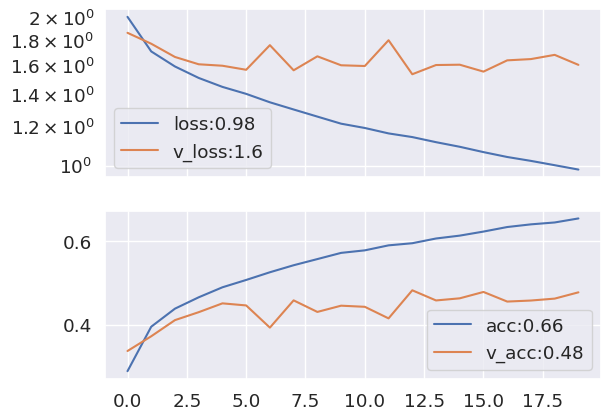

391/391 [==============================] - 5s 13ms/step - loss: 0.9815 - accuracy: 0.6553 - val_loss: 1.6020 - val_accuracy: 0.4777


In [45]:
print('Not using data augmentation.')
batch_size = 128
epochs = 20
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[plot]
          )

#### Вариант 3 - попытка улучшить вариант 2, не используется

In [57]:
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


num_classes = 10  # Количество классов
input_shape = (32, 32, 3)  # Размер входного изображения

model = Sequential()
model.add(Flatten(input_shape=input_shape))

# Скрытые слои с Dropout и BatchNormalization
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Activation('mish'))


model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Activation('mish'))


model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Activation('mish'))



model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))


# Выходной слой
model.add(Dense(num_classes, activation='softmax'))

# Оптимизатор и функция потерь
opt = Adam(0.001)
loss = CategoricalCrossentropy()


model.compile(loss=loss,
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_68 (Ba  (None, 3072)              12288     
 tchNormalization)                                               
                                                                 
 dense_89 (Dense)            (None, 256)               786688    
                                                                 
 activation_78 (Activation)  (None, 256)               0         
                                                                 
 batch_normalization_69 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_90 (Dense)            (None, 64)               

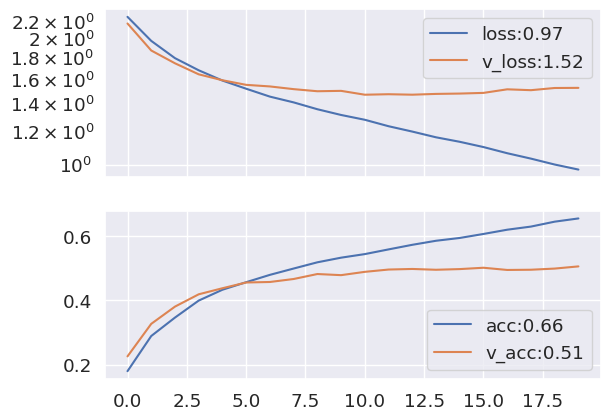

196/196 [==============================] - 4s 20ms/step - loss: 0.9729 - accuracy: 0.6557 - val_loss: 1.5227 - val_accuracy: 0.5062


In [58]:
batch_size = 256
epochs = 20
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[plot]
          )

#### Вариант 2 - дал лучший результат, используется далее в коде

In [59]:
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy


num_classes = 10  # Количество классов
input_shape = (32, 32, 3)  # Размер входного изображения

model = Sequential()
model.add(Flatten(input_shape=input_shape))

# Скрытые слои с Dropout и BatchNormalization
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Activation('mish'))

# Выходной слой
model.add(Dense(num_classes, activation='softmax'))

# Оптимизатор и функция потерь
opt = Adam(0.001)
loss = CategoricalCrossentropy()

model.compile(loss=loss,
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 batch_normalization_79 (Ba  (None, 3072)              12288     
 tchNormalization)                                               
                                                                 
 dense_101 (Dense)           (None, 256)               786688    
                                                                 
 activation_88 (Activation)  (None, 256)               0         
                                                                 
 batch_normalization_80 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_102 (Dense)           (None, 64)              

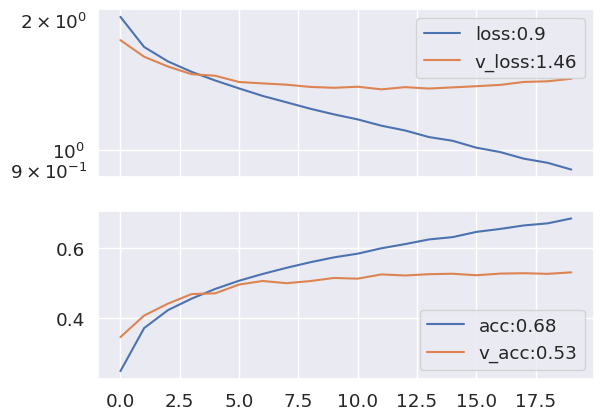

391/391 [==============================] - 7s 19ms/step - loss: 0.9017 - accuracy: 0.6843 - val_loss: 1.4637 - val_accuracy: 0.5311


In [60]:
batch_size = 128
epochs = 20
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[plot]
          )

**Изменения, внесенные в модель**

*   Удален слой Flatten (входные данные уже представлены 1D вектором)
*   Сокращено количество скрытых слоев с 12 до 9
*   Первый скрытый слой: 256 нейронов (вместо 32)
*   Последующие слои: 64, 32, 16 нейронов (вместо 32)
*   Добавлены слои BatchNormalization после каждого Dense слоя


Функция активации Mish после каждого Dense слоя сохранена.


# Отображение результата
Отобразим результат распознавания 10 случайных тестовых изображений

          GT class           Predicted class                   Probability
1/1 [==============================] - 0s 277ms/step


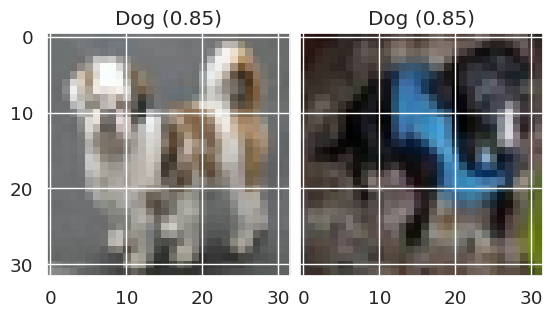

1/1 [==============================] - 0s 20ms/step


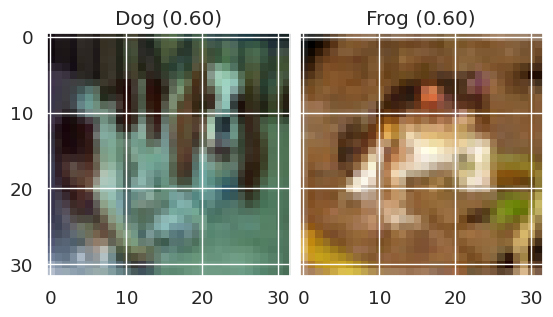

1/1 [==============================] - 0s 19ms/step


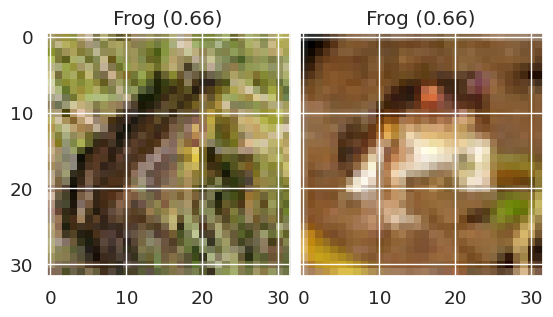

1/1 [==============================] - 0s 21ms/step


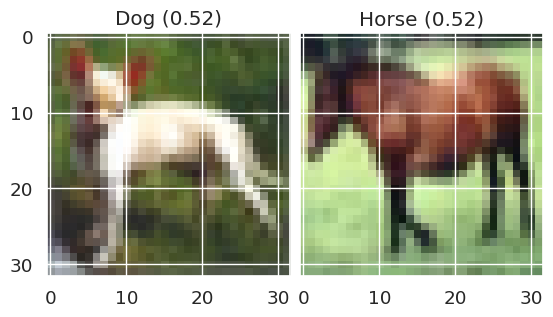

1/1 [==============================] - 0s 20ms/step


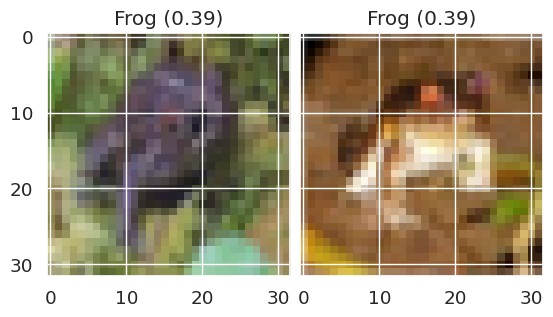

1/1 [==============================] - 0s 21ms/step


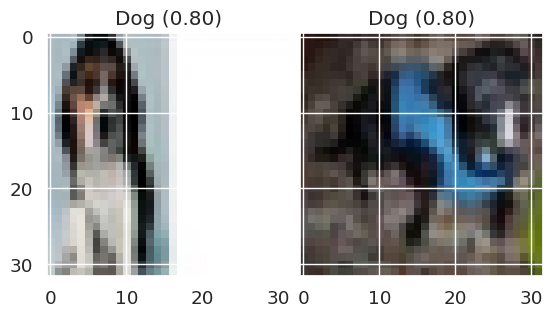

1/1 [==============================] - 0s 18ms/step


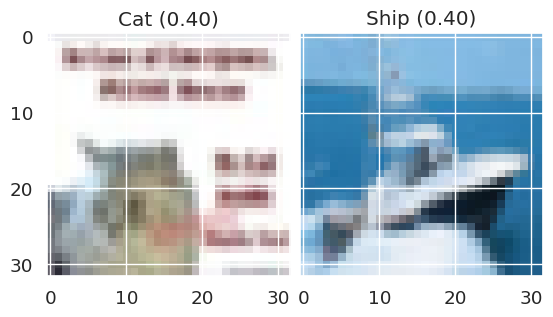

1/1 [==============================] - 0s 19ms/step


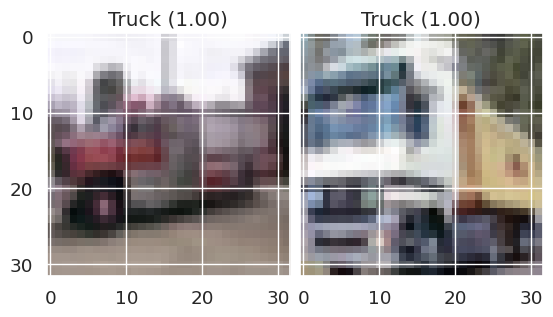

1/1 [==============================] - 0s 20ms/step


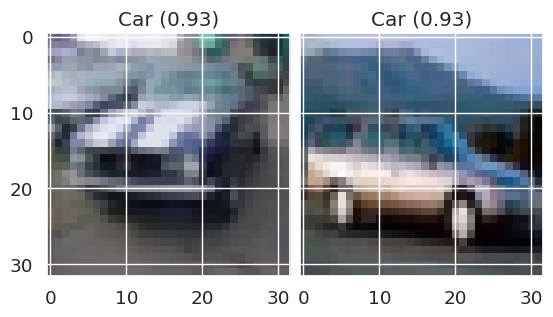

1/1 [==============================] - 0s 19ms/step


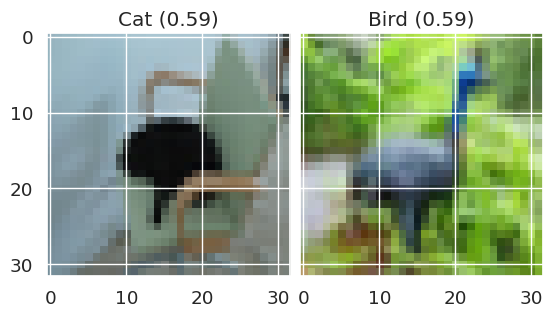

In [61]:
from matplotlib.colors import Colormap
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

class_list = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def get_class_sample(cls_index):
    for i in range(len(y_train)):
        if np.argmax(y_train[i]) == cls_index:
            return x_train[i]
    return None

print("          GT class           Predicted class                   Probability")

for i in range(10):
    plt.set_cmap(Colormap("Greys"))
    fig = plt.figure(1, (4., 4.))
    grid = ImageGrid(fig, 111,
                    nrows_ncols=(1, 2),
                    axes_pad=0.1)

    images = []
    np_images = []
    k = random.randint(0,len(x_test)-1)
    images.append(np.expand_dims(x_test[k], axis=0))
    np_images = np.vstack(images)
    y = model.predict(np_images)

    c = np.argmax(y[0])
    cls_name_pred = c
    cls_name_gt = np.argmax(y_test[k])

    img = x_test[k]
    img_pred = get_class_sample(cls_name_pred)

    grid[0].imshow(np.reshape(img,(32,32,3)))
    pred_prob = y[0][cls_name_pred]
    grid[0].set_title(f"{class_list[cls_name_gt]} ({pred_prob:.2f})")

    grid[1].imshow(np.reshape(img_pred,(32,32,3)))
    pred_prob = y[0][cls_name_pred]
    grid[1].set_title(f"{class_list[cls_name_pred]} ({pred_prob:.2f})")

    plt.show()



In [13]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


1/1 [==============================] - 0s 23ms/step


<Axes: >

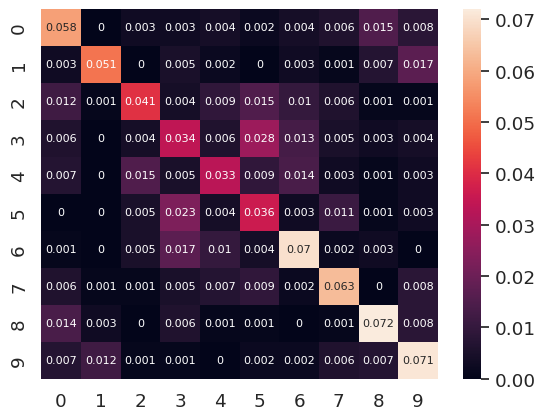

In [62]:
import pandas as pd
import seaborn as sn

def get_conf_matrix(x_test, y_test):
    m = np.zeros((10,10))
    acc = 0
    i = 0
    for x in x_test:
        yp = np.argmax(model.predict(np.expand_dims(x, axis=0)))
        m[np.argmax(y_test[i]),yp] += 1
        i = i+1
    m = m/len(y_test)

    return m

m = get_conf_matrix(x_test[:1000], y_test[:1000])
df_cm = pd.DataFrame(m, range(10), range(10))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8})

**Загрузим и классифицируем произвольное изображение**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/MyDrive/*.jpg': No such file or directory
(1500, 2100, 3)
1/1 [==============================] - 0s 19ms/step
0.005126356 Airplane
0.02765968 Car
0.0008249902 Bird
0.0008497499 Cat
0.001312128 Deer
0.0007944627 Dog
0.00011770249 Frog
0.0037611313 Horse
0.022978628 Ship
0.9365752 Truck


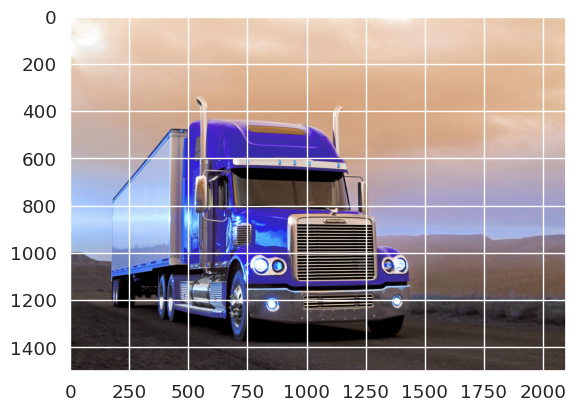

In [63]:
import cv2
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/*.jpg

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/truck.jpg")
print(img.shape)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = img[...,::-1]
img = cv2.resize(img,(32,32))
img = img.astype("float32")/255
y = model.predict(np.expand_dims(img,0))

for i, j in enumerate(y[0]):
  print(j, class_list[i])

**Подведение итогов**

В ходе выполнения лабораторной работы проведены эксперементы с различными параметрами моделей для достижения максимальной точности предсказания.

Удалось добится значения параметра v_acc = 0.53. Как можно видеть в разделе "Отображение результата", тест модели на выборке из 10 случайных изображений дал хороший результат. Есть даже изображения со 100% вероятностью предсказания.

Точность предсказания произвольного изображения удалось поднять до 93% (ранее было значение в 50%, получено при тестировании исходной модели)